## Dataset initialization 

In [1]:
# import required libraries
import pandas as pd

In [2]:
#import data sets about genomic data
df0=pd.read_csv('KIRC_miRNA_HiSeq_gene.data',sep='\t').set_index('sample').T
df1=pd.read_csv('KIRP_miRNA_HiSeq_gene.data',sep='\t').set_index('sample').T
df2=pd.read_csv('KICH_miRNA_HiSeq_gene.data',sep='\t').set_index('sample').T

In [3]:
df0.shape, df1.shape, df2.shape

((311, 2049), (321, 2115), (89, 1918))

In [4]:
# concat datasets related to 3 subtypes
df=pd.concat([df0, df1, df2])

In [5]:
df.shape

(721, 2185)

## Preprocessing stage

In [6]:
# drop duplicate rows
df=df.drop_duplicates()

In [7]:
df.shape

(721, 2185)

- No duplicates

In [8]:
df.isnull().sum()

sample
MIMAT0019868    615
MIMAT0019869    634
MIMAT0019860    620
MIMAT0019861    720
MIMAT0019862    642
               ... 
MIMAT0022480    719
MIMAT0021128    720
MIMAT0021127    720
MIMAT0004685    720
MIMAT0022493    720
Length: 2185, dtype: int64

- Lots of null valued features exist

In [9]:
# Count the null values containing features
n=(df.isnull().sum()>0).sum()
n

1958

In [10]:
# Check the null values
df.isnull().sum().sort_values(ascending = False).head(n)

sample
MIMAT0022493    720
MIMAT0005940    720
MIMAT0027480    720
MIMAT0028227    720
MIMAT0022479    720
               ... 
MIMAT0004604      1
MIMAT0004518      1
MIMAT0000688      1
MIMAT0000691      1
MIMAT0019208      1
Length: 1958, dtype: int64

In [11]:
# drop the null values
df=df.dropna(axis=1)

In [12]:
df.shape

(721, 227)

In [13]:
# count the features which have more zero values 
i=1
exceed=0

for column_name in df.columns:
    column = df[column_name]
    
    # avoid removing the 'Subtype' column
    if i == len(df.columns):
        continue
        
    # Get the count of Zeros in column 
    count = (column == 0).sum()

    if count>0:
        exceed+=1

    i+=1
    
print('Features which have zero values:\t', exceed)

Features which have zero values:	 0


* No zero values

In [14]:
# use Pearson correlation to find the correlation between variables
cor = df.corr(method='pearson')
cor

sample,MIMAT0000764,MIMAT0000761,MIMAT0000760,MIMAT0000763,MIMAT0026738,MIMAT0004946,MIMAT0004766,MIMAT0004808,MIMAT0004809,MIMAT0004481,...,MIMAT0004693,MIMAT0004692,MIMAT0004694,MIMAT0004697,MIMAT0004673,MIMAT0004672,MIMAT0004588,MIMAT0004585,MIMAT0004584,Subtype
sample,,,,,,,,,,,,,,,,,,,,,
MIMAT0000764,1.000000,0.575622,0.274550,0.206451,0.318641,0.236725,0.332800,0.403895,0.219344,0.376799,...,0.144628,0.170372,0.482700,0.441069,0.197624,0.224624,0.197188,0.313105,0.086577,-0.313749
MIMAT0000761,0.575622,1.000000,0.460793,0.157569,0.506188,0.595911,0.273757,0.207331,0.322729,0.425234,...,0.194837,0.069802,0.416174,0.492820,0.401965,0.021674,0.317303,0.326724,0.251785,-0.239759
MIMAT0000760,0.274550,0.460793,1.000000,0.105361,0.560225,0.620914,0.217476,0.130900,0.493675,0.203962,...,0.445706,0.040861,0.488525,0.420006,0.440483,0.440122,0.071068,0.603689,0.637904,-0.167696
MIMAT0000763,0.206451,0.157569,0.105361,1.000000,0.196045,0.114390,0.088145,-0.214972,0.384986,0.286159,...,0.366652,0.098905,0.329808,0.410150,0.425131,-0.002952,0.243657,0.390222,-0.035060,-0.479382
MIMAT0026738,0.318641,0.506188,0.560225,0.196045,1.000000,0.661090,0.212275,0.163877,0.504458,0.139670,...,0.283628,0.060915,0.431503,0.546108,0.381477,0.209275,0.250869,0.339440,0.438152,-0.318077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIMAT0004672,0.224624,0.021674,0.440122,-0.002952,0.209275,0.216505,0.365676,0.454639,0.092271,0.039477,...,0.514139,0.224127,0.437199,0.199487,-0.203465,1.000000,-0.196994,0.361705,0.238658,-0.048213
MIMAT0004588,0.197188,0.317303,0.071068,0.243657,0.250869,0.243495,-0.079882,-0.173010,0.367393,0.387716,...,-0.034922,-0.072999,0.117220,0.342549,0.403038,-0.196994,1.000000,0.141548,0.080174,-0.292413
MIMAT0004585,0.313105,0.326724,0.603689,0.390222,0.339440,0.403603,0.246541,0.019324,0.547993,0.382497,...,0.619747,-0.009230,0.513820,0.318076,0.469191,0.361705,0.141548,1.000000,0.436113,-0.375321


In [15]:
c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
high_cor = c1[c1.values!=1]    
high_cor[high_cor>0.9]

sample        sample      
MIMAT0022834  MIMAT0000710    0.999994
MIMAT0000232  MIMAT0004563    0.999974
MIMAT0000460  MIMAT0000222    0.974252
MIMAT0000261  MIMAT0000259    0.970452
MIMAT0000445  MIMAT0000444    0.950033
MIMAT0001631  MIMAT0004600    0.949885
MIMAT0000437  MIMAT0004601    0.946854
MIMAT0000446  MIMAT0000733    0.941053
MIMAT0000231  MIMAT0000232    0.938827
MIMAT0004563  MIMAT0000231    0.938267
MIMAT0000318  MIMAT0000682    0.932302
MIMAT0004600  MIMAT0002177    0.927663
MIMAT0004559  MIMAT0000258    0.927155
MIMAT0001631  MIMAT0002177    0.916373
MIMAT0000256  MIMAT0000257    0.908278
MIMAT0004909  MIMAT0003389    0.907634
MIMAT0000318  MIMAT0001536    0.905601
MIMAT0000433  MIMAT0000434    0.901821
MIMAT0001536  MIMAT0000682    0.901741
MIMAT0004766  MIMAT0002809    0.901619
MIMAT0000461  MIMAT0002820    0.901088
dtype: float64

In [16]:
# MultiIndex into temp file
temp= high_cor[high_cor>0.9].index

In [17]:
# temp set for store features which are high correlated
tset=set()

In [18]:
for i in range(temp.size):
    tset.add(temp[i][0])

In [19]:
len(tset)

19

In [20]:
tset

{'MIMAT0000231',
 'MIMAT0000232',
 'MIMAT0000256',
 'MIMAT0000261',
 'MIMAT0000318',
 'MIMAT0000433',
 'MIMAT0000437',
 'MIMAT0000445',
 'MIMAT0000446',
 'MIMAT0000460',
 'MIMAT0000461',
 'MIMAT0001536',
 'MIMAT0001631',
 'MIMAT0004559',
 'MIMAT0004563',
 'MIMAT0004600',
 'MIMAT0004766',
 'MIMAT0004909',
 'MIMAT0022834'}

In [21]:
# drop high correlated features  
df= df.drop(tset,axis=1)

In [22]:
# after removing more corelated features
df.shape

(721, 208)

In [23]:
cor = df.corr(method='pearson')

In [24]:
# correlation of variables with the target variable
cor_target = abs(cor["Subtype"])
cor_target

sample
MIMAT0000764    0.313749
MIMAT0000761    0.239759
MIMAT0000760    0.167696
MIMAT0000763    0.479382
MIMAT0026738    0.318077
                  ...   
MIMAT0004672    0.048213
MIMAT0004588    0.292413
MIMAT0004585    0.375321
MIMAT0004584    0.166288
Subtype         1.000000
Name: Subtype, Length: 208, dtype: float64

In [25]:
# first 100 features with high correlation
high_cor_100=cor_target.iloc[cor_target.argsort()[-101:-1]]
high_cor_100

sample
MIMAT0000728    0.252584
MIMAT0004688    0.252808
MIMAT0000426    0.262397
MIMAT0002872    0.265972
MIMAT0004927    0.271971
                  ...   
MIMAT0000245    0.584633
MIMAT0000753    0.585266
MIMAT0000083    0.604919
MIMAT0004809    0.655117
MIMAT0000278    0.660964
Name: Subtype, Length: 100, dtype: float64

In [26]:
# select 100 features
selected_100_x = df[high_cor_100.index]
selected_100_x.shape

(721, 100)

In [27]:
#first 50 features with high correlation
high_cor_50=cor_target.iloc[cor_target.argsort()[-51:-1]]

# select 50 features
selected_50_x = df[high_cor_50.index]
selected_50_x.shape

(721, 50)

In [28]:
#first 150 features with high correlation
high_cor_150=cor_target.iloc[cor_target.argsort()[-151:-1]]

# select 150 features
selected_150_x = df[high_cor_150.index]
selected_150_x.shape

(721, 150)

In [29]:
#first 200 features with high correlation
high_cor_200=cor_target.iloc[cor_target.argsort()[-201:-1]]

# select 200 features
selected_200_x = df[high_cor_200.index]
selected_200_x.shape

(721, 200)

## Dataset balancing 

In [30]:
df['Subtype'].value_counts()

1.0    321
0.0    311
2.0     89
Name: Subtype, dtype: int64

- Dataset unbalanced

### Oversampling & Undersampling 

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

req_f=100

# Resampling the minority class. The strategy can be changed as required.
ros = RandomOverSampler(sampling_strategy={2: req_f}, random_state=42)

# Resampling the majority classes. The strategy can be changed as required.
rus = RandomUnderSampler(sampling_strategy={0: req_f,1:req_f}, random_state=42)

In [32]:
Y=df['Subtype']

In [33]:
x=df.drop(['Subtype'], axis=1)

In [34]:
x.shape

(721, 207)

In [35]:
# Fit the model to generate the data with all features dataset
oversampled_X, oversampled_Y = ros.fit_resample(x, Y)
sampled_X, sampled_Y = rus.fit_resample(oversampled_X, oversampled_Y)

In [36]:
# Fit the model to generate the data with 200 features dataset
oversampled_X_200, oversampled_Y = ros.fit_resample(selected_200_x, Y)
sampled_X_200, sampled_Y = rus.fit_resample(oversampled_X_200, oversampled_Y)

In [37]:
# Fit the model to generate the data with 150 features dataset
oversampled_X_150, oversampled_Y = ros.fit_resample(selected_150_x, Y)
sampled_X_150, sampled_Y = rus.fit_resample(oversampled_X_150, oversampled_Y)

In [38]:
# Fit the model to generate the data with 100 features dataset
oversampled_X_100, oversampled_Y = ros.fit_resample(selected_100_x, Y)
sampled_X_100, sampled_Y = rus.fit_resample(oversampled_X_100, oversampled_Y)

In [39]:
# Fit the model to generate the data with 50 features dataset
oversampled_X_50, oversampled_Y = ros.fit_resample(selected_50_x, Y)
sampled_X_50, sampled_Y = rus.fit_resample(oversampled_X_50, oversampled_Y)

In [40]:
sampled_Y.value_counts()

0.0    100
2.0    100
1.0    100
Name: Subtype, dtype: int64

### 5. Feature Scaling

In [ ]:
sampled_X.min(axis=0)

In [ ]:
sampled_X.max(axis=0)

## Test the models 

In [41]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

#### Check the kernels in SVM 

In [42]:
acc = cross_val_score(svm.SVC(random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with rbf kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with rbf kernel: 0.91 (+/- 0.06)


In [43]:
acc = cross_val_score(svm.SVC(kernel='poly',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with poly kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with poly kernel: 0.96 (+/- 0.03)


In [44]:
acc = cross_val_score(svm.SVC(kernel='linear',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with linear kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with linear kernel: 0.95 (+/- 0.04)


In [45]:
acc = cross_val_score(svm.SVC(kernel='sigmoid',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with sigmoid kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with sigmoid kernel: 0.58 (+/- 0.09)


* poly performed well

#### Check the feature scaling method to SVM

In [46]:
svc=svm.SVC(kernel='poly', random_state=0)

In [47]:
acc = cross_val_score(svc, sampled_X, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.96 (+/- 0.03)


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [49]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Standardization: 0.95 (+/- 0.06)


In [50]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Normalizaton: 0.95 (+/- 0.04)


- Standerdization performs well

#### Evaluation using standerdization

In [52]:
acc = cross_val_score(svc, sampled_X_50, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.93 (+/- 0.07)


In [53]:
acc = cross_val_score(svc, sampled_X_100, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.95 (+/- 0.06)


In [54]:
acc = cross_val_score(svc, sampled_X_150, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.95 (+/- 0.03)


In [55]:
acc = cross_val_score(svc, sampled_X_200, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.96 (+/- 0.03)


#### Select features with the range of 150 to 200

In [56]:
#first 170 atures with high correlation
high_cor_170=cor_target.iloc[cor_target.argsort()[-171:-1]]

# select 170 features
selected_170_x = df[high_cor_170.index]
selected_170_x.shape


# Fit the model to generate the data with 170 features dataset
oversampled_X_170, oversampled_Y = ros.fit_resample(selected_170_x, Y)
sampled_X_170, sampled_Y = rus.fit_resample(oversampled_X_170, oversampled_Y)


acc = cross_val_score(svc, sampled_X_170, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.95 (+/- 0.02)


In [57]:
#first 180 atures with high correlation
high_cor_180=cor_target.iloc[cor_target.argsort()[-181:-1]]

# select 180 features
selected_180_x = df[high_cor_180.index]
selected_180_x.shape


# Fit the model to generate the data with 180 features dataset
oversampled_X_180, oversampled_Y = ros.fit_resample(selected_180_x, Y)
sampled_X_180, sampled_Y = rus.fit_resample(oversampled_X_180, oversampled_Y)


acc = cross_val_score(svc, sampled_X_180, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.95 (+/- 0.02)


In [58]:
#first 190 atures with high correlation
high_cor_190=cor_target.iloc[cor_target.argsort()[-191:-1]]

# select 190 features
selected_190_x = df[high_cor_190.index]
selected_190_x.shape


# Fit the model to generate the data with 190 features dataset
oversampled_X_190, oversampled_Y = ros.fit_resample(selected_190_x, Y)
sampled_X_190, sampled_Y = rus.fit_resample(oversampled_X_190, oversampled_Y)


acc = cross_val_score(svc, sampled_X_190, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.96 (+/- 0.03)


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

#### RF Parameter optimization

In [60]:
rfc = RandomForestClassifier()

In [61]:
parameters = {
    "n_estimators":[100,500,1000],
    "max_depth":[4,8,16,None],
    "criterion":['gini', 'entropy'],
    "random_state": [0]
}

In [62]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(sampled_X,sampled_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16, None],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [0]})

In [63]:
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100, 'random_state': 0}


In [64]:
rf=RandomForestClassifier(criterion= 'gini', max_depth= 8, n_estimators= 100,random_state= 0)

In [66]:
acc = cross_val_score(rf, sampled_X, sampled_Y, cv=5)
print("Accuracy RF with best_params: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF with best_params: 0.94 (+/- 0.05)


#### Check the feature scaling method to RF

In [67]:
acc = cross_val_score(rf, sampled_X, sampled_Y, cv=5)
print("Accuracy RF without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF without transformation: 0.94 (+/- 0.05)


In [68]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model', rf)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy RF with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF with Standardization: 0.94 (+/- 0.05)


In [69]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', rf)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM with Normalization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Normalization: 0.94 (+/- 0.05)


#### Try for different number of features

In [72]:
acc = cross_val_score(rf, sampled_X_50, sampled_Y, cv=5)
print("Accuracy RF using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 50 features: 0.93 (+/- 0.03)


In [73]:
acc = cross_val_score(rf, sampled_X_100, sampled_Y, cv=5)
print("Accuracy RF using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 100 features: 0.94 (+/- 0.03)


In [74]:
acc = cross_val_score(rf, sampled_X_150, sampled_Y, cv=5)
print("Accuracy RF using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 150 features: 0.94 (+/- 0.05)


In [75]:
acc = cross_val_score(rf, sampled_X_200, sampled_Y, cv=5)
print("Accuracy RF using best 200 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 200 features: 0.94 (+/- 0.06)


In [76]:
acc = cross_val_score(rf, sampled_X_170, sampled_Y, cv=5)
print("Accuracy RF using best 170 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 150 features: 0.95 (+/- 0.05)


In [77]:
acc = cross_val_score(rf, sampled_X_180, sampled_Y, cv=5)
print("Accuracy RF using best 180 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 150 features: 0.95 (+/- 0.06)


In [78]:
acc = cross_val_score(rf, sampled_X_190, sampled_Y, cv=5)
print("Accuracy RF using best 190 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 150 features: 0.94 (+/- 0.05)


In [79]:
#first 160 atures with high correlation
high_cor_160=cor_target.iloc[cor_target.argsort()[-161:-1]]

# select 160 features
selected_160_x = df[high_cor_160.index]
selected_160_x.shape


# Fit the model to generate the data with 160 features dataset
oversampled_X_160, oversampled_Y = ros.fit_resample(selected_160_x, Y)
sampled_X_160, sampled_Y = rus.fit_resample(oversampled_X_160, oversampled_Y)


acc = cross_val_score(svc, sampled_X_160, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.95 (+/- 0.02)


## Test KNN model

In [80]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#### Find the best k value for KNN 

Text(0, 0.5, 'Accuracy')

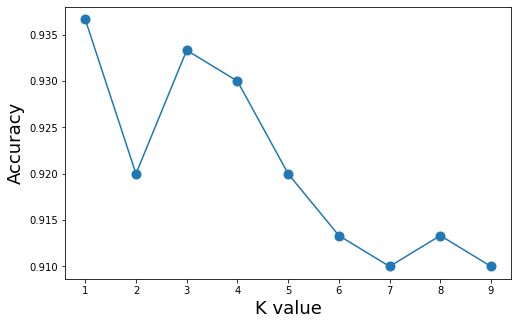

In [81]:
knn_acc = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    acc = cross_val_score(knn, sampled_X, sampled_Y, cv=10)
    knn_acc.append(acc.mean())

plt.figure(figsize=(8,5))
plt.plot(range(1,10),knn_acc, marker='o', markersize=9)
plt.xlabel("K value", fontsize=18)
plt.ylabel("Accuracy",fontsize=18)

- k=4 is optimal

#### Check the feature scaling method to KNN

#### for k=4

In [82]:
knn = KNeighborsClassifier(n_neighbors=4)

In [83]:
acc = cross_val_score(knn, sampled_X, sampled_Y, cv=10)
print("Accuracy KNN without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN without transformation: 0.93 (+/- 0.08)


In [84]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=10
                        )

print("Accuracy KNN with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Standardization: 0.94 (+/- 0.07)


In [85]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=10
                        )

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.07)


- Without transformation performed well

#### Evaluation without Feaure scaling

In [117]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model',knn)])

In [124]:
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()), ('model', knn)])

In [125]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_50, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.92 (+/- 0.09)


In [126]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_100, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.08)


In [127]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_150, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.07)


In [128]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_200, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.07)


#### Select features between 100 to 200

In [129]:
#first 110 atures with high correlation
high_cor_110=cor_target.iloc[cor_target.argsort()[-111:-1]]

# select 110 features
selected_110_x = df[high_cor_110.index]
selected_110_x.shape


# Fit the model to generate the data with 110 features dataset
oversampled_X_110, oversampled_Y = ros.fit_resample(selected_110_x, Y)
sampled_X_110, sampled_Y = rus.fit_resample(oversampled_X_110, oversampled_Y)


# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_110, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.07)


In [130]:
#first 130 atures with high correlation
high_cor_130=cor_target.iloc[cor_target.argsort()[-131:-1]]

# select 130 features
selected_130_x = df[high_cor_130.index]
selected_130_x.shape


# Fit the model to generate the data with 130 features dataset
oversampled_X_130, oversampled_Y = ros.fit_resample(selected_130_x, Y)
sampled_X_130, sampled_Y = rus.fit_resample(oversampled_X_130, oversampled_Y)


# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_130, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.09)


In [108]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_160, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.07)


In [109]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_170, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.08)


In [110]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_180, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.08)


In [111]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_190, y=sampled_Y, cv=10)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.07)


In [131]:
import csv
with open('best_200_features.csv', 'w', encoding='UTF8',newline='') as f:
    writer = csv.writer(f)
    
    for i in range(sampled_X_200.shape[1]):
        # write the data
        writer.writerow([sampled_X_200.columns[i]])